In [196]:
import numpy as np
import json
from PIL import Image, ImageDraw

In [197]:
json_file = "../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000000_000019_gtFine_polygons.json"

In [198]:
with open('../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000000_000019_gtFine_polygons.json', 'r') as f:
    data = json.load(f)

In [199]:
for ob in data['objects']:
    print(ob)

{'label': 'road', 'polygon': [[0, 769], [290, 574], [93, 528], [0, 524], [0, 448], [0, 448], [210, 453], [511, 451], [782, 459], [892, 495], [943, 498], [1044, 471], [1490, 486], [1880, 519], [1922, 512], [1975, 522], [2047, 524], [2047, 570], [1668, 553], [2047, 597], [2047, 1023], [892, 1023], [0, 1023]]}
{'label': 'sidewalk', 'polygon': [[2047, 532], [1911, 537], [1828, 540], [1782, 540], [1794, 552], [2047, 564]]}
{'label': 'car', 'polygon': [[806, 503], [803, 524], [796, 528], [785, 528], [778, 527], [776, 520], [771, 520], [768, 515], [732, 515], [728, 523], [722, 523], [715, 524], [714, 523], [711, 520], [709, 517], [706, 517], [702, 520], [697, 529], [690, 532], [681, 532], [678, 529], [674, 527], [671, 517], [635, 514], [632, 525], [615, 526], [611, 521], [609, 483], [620, 464], [629, 459], [625, 453], [629, 450], [634, 450], [639, 455], [644, 456], [644, 453], [643, 450], [658, 429], [672, 422], [674, 420], [766, 420], [780, 430], [789, 447], [793, 453], [800, 456], [804, 470

In [200]:
image_filename = data['objects'][0]['label']
image_filename

'road'

In [201]:
annotations = data['objects'][0]['polygon']
annotations

[[0, 769],
 [290, 574],
 [93, 528],
 [0, 524],
 [0, 448],
 [0, 448],
 [210, 453],
 [511, 451],
 [782, 459],
 [892, 495],
 [943, 498],
 [1044, 471],
 [1490, 486],
 [1880, 519],
 [1922, 512],
 [1975, 522],
 [2047, 524],
 [2047, 570],
 [1668, 553],
 [2047, 597],
 [2047, 1023],
 [892, 1023],
 [0, 1023]]

In [202]:
polygon_annotation = []
for x, y in annotations:
    polygon_annotation.append((x, y))
polygon_annotation

[(0, 769),
 (290, 574),
 (93, 528),
 (0, 524),
 (0, 448),
 (0, 448),
 (210, 453),
 (511, 451),
 (782, 459),
 (892, 495),
 (943, 498),
 (1044, 471),
 (1490, 486),
 (1880, 519),
 (1922, 512),
 (1975, 522),
 (2047, 524),
 (2047, 570),
 (1668, 553),
 (2047, 597),
 (2047, 1023),
 (892, 1023),
 (0, 1023)]

In [203]:
data

{'imgHeight': 1024,
 'imgWidth': 2048,
 'objects': [{'label': 'road',
   'polygon': [[0, 769],
    [290, 574],
    [93, 528],
    [0, 524],
    [0, 448],
    [0, 448],
    [210, 453],
    [511, 451],
    [782, 459],
    [892, 495],
    [943, 498],
    [1044, 471],
    [1490, 486],
    [1880, 519],
    [1922, 512],
    [1975, 522],
    [2047, 524],
    [2047, 570],
    [1668, 553],
    [2047, 597],
    [2047, 1023],
    [892, 1023],
    [0, 1023]]},
  {'label': 'sidewalk',
   'polygon': [[2047, 532],
    [1911, 537],
    [1828, 540],
    [1782, 540],
    [1794, 552],
    [2047, 564]]},
  {'label': 'car',
   'polygon': [[806, 503],
    [803, 524],
    [796, 528],
    [785, 528],
    [778, 527],
    [776, 520],
    [771, 520],
    [768, 515],
    [732, 515],
    [728, 523],
    [722, 523],
    [715, 524],
    [714, 523],
    [711, 520],
    [709, 517],
    [706, 517],
    [702, 520],
    [697, 529],
    [690, 532],
    [681, 532],
    [678, 529],
    [674, 527],
    [671, 517],
    [635, 

In [204]:
# Créer le masque binaire
mask = np.zeros((data['imgHeight'], data['imgWidth'], 2), dtype=np.uint8)

In [205]:
mask

array([[[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]], dtype=uint8)

In [206]:
mask_image = Image.new("L", (data['imgWidth'], data['imgHeight']), 0)

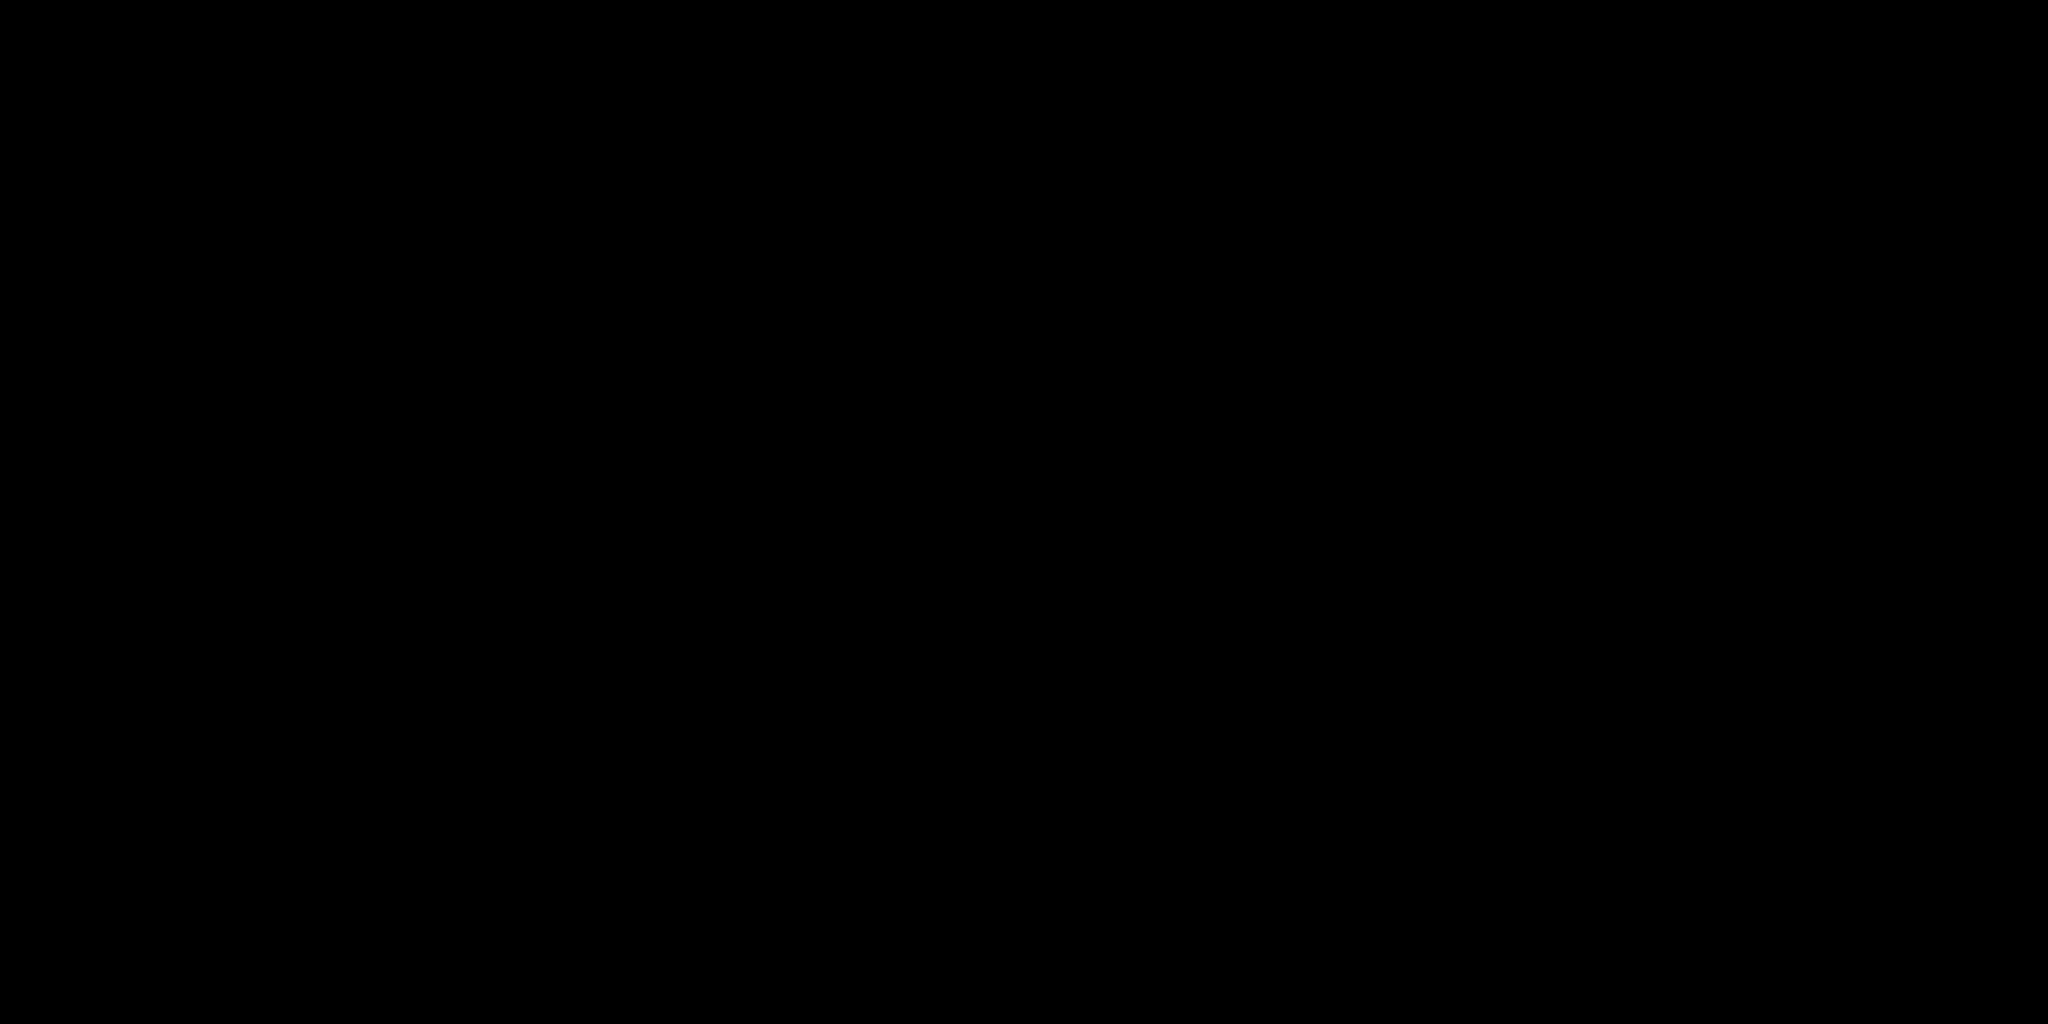

In [207]:
mask_image

In [208]:
ImageDraw.Draw(mask_image).polygon(polygon_annotation, outline=1, fill=255)

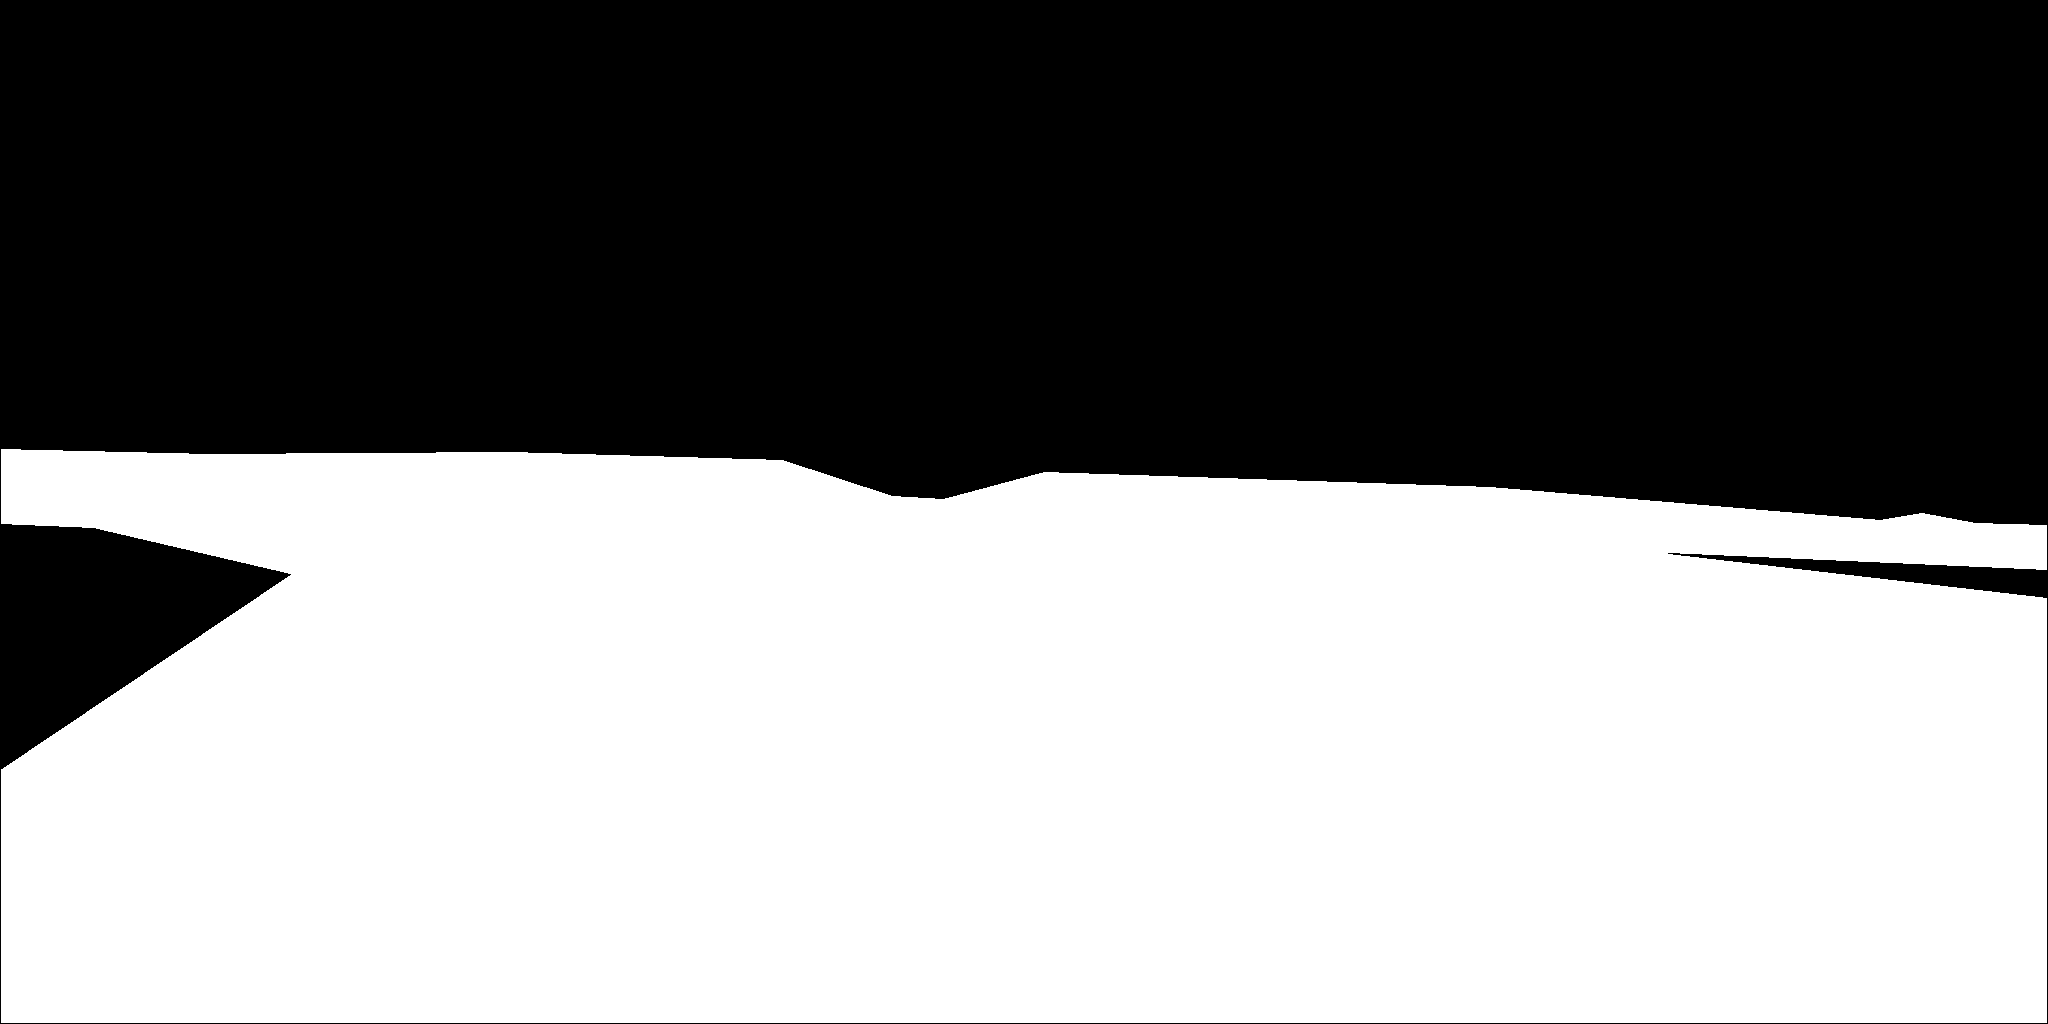

In [209]:
mask_image

In [210]:
mask = np.array(mask_image)

In [211]:
print(mask)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  1 255 255 ... 255 255   1]
 [  1 255 255 ... 255 255   1]
 [  1   1   1 ...   1   1   1]]


In [212]:
np.save("mask_test.npy", mask)